<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%201%20Pandas/team%2018/SMOL__Assignment_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USA House Listing

This dataset is about the house listing in United States of America. We found the dataset from Kaggle. The data were analysed using Python programming language with the help from other libraries such as mathplotlib, seaborn, pandas, geopandas and folium.

##Group Members:


1.   ADAM WAFII BIN AZUAR (A20EC0002)
2.   MUHAMMAD DINIE HAZIM BIN AZALI (A20EC0084)



## Downloading the Dataset

1. Open www.kaggle.com/datasets
2. Go to filters and filter .CSV file type.
3. Search for USA Housing Listings.
4. We did not download it in our drive but we install it in Colab.

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
!pip install kaggle
!pip install matplotlib
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d austinreese/usa-housing-listings

usa-housing-listings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip usa-housing-listings.zip

Archive:  usa-housing-listings.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: housing.csv             


The dataset has been downloaded and extracted.

## Importing Libraries and Reading Dataset

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

df = pd.read_csv("housing.csv")
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,https://reno.craigslist.org/apa/d/reno-2x2-thi...,reno / tahoe,https://reno.craigslist.org,1295,apartment,957,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00O0O_atyH2pgYeH...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
384973,7049052968,https://reno.craigslist.org/apa/d/sparks-over-...,reno / tahoe,https://reno.craigslist.org,1549,apartment,1034,2,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00808_3EobCZHFEx...,AN OASIS OF YOUR OWN Introducing Lumina at Spa...,39.6269,-119.708,ca
384974,7049050454,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1249,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/01111_kr3uKMhzrf...,***Newly MODERNIZED Apartment Home*** âï¸ ...,39.5358,-119.746,ca
384975,7049050149,https://reno.craigslist.org/apa/d/sparks-ready...,reno / tahoe,https://reno.craigslist.org,1429,apartment,976,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00c0c_1GslcQnpLP...,Welcome Home We welcome you to The Villas at D...,39.5585,-119.703,ca


Next step

## Data Preparation and Cleaning

This section show the data cleaning process by removing the null values in the dataset, changing the datatype for the necessary data and changing the format for some values in the dataset.



In [ ]:
import random
import folium
import numpy as np
import geopandas as gpd
import seaborn as sn
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
n = sum(1 for line in open("housing.csv"))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pd.read_csv("housing.csv", skiprows=skip)
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049031994,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,982,apartment,919,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049036811,https://reno.craigslist.org/apa/d/reno-20-minu...,reno / tahoe,https://reno.craigslist.org,1895,apartment,1193,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/01212_hHbChrx2vM...,"Inova14001 SUMMIT SIERRA BLVDReno, NV 89511Tak...",39.4015,-119.755,ca
2,7049022135,https://reno.craigslist.org/apa/d/reno-studio-...,reno / tahoe,https://reno.craigslist.org,875,apartment,550,0,1.0,0,...,0,0,0,laundry on site,NaN,https://images.craigslist.org/00101_bE7xXUplK1...,"Grove Manor, Reno's most convenient location. ...",39.4972,-119.776,ca
3,7049021849,https://reno.craigslist.org/apa/d/reno-rocky-m...,reno / tahoe,https://reno.craigslist.org,1395,duplex,988,2,1.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00707_8v83WpH0sS...,12001 Rocky Mountain Street Pro...,39.6412,-119.873,ca
4,7049006484,https://reno.craigslist.org/apa/d/fully-furnis...,reno / tahoe,https://reno.craigslist.org,1125,apartment,420,1,1.0,0,...,0,0,1,laundry on site,off-street parking,https://images.craigslist.org/00D0D_bCr6nG7nHi...,"1 Bedroom apartment, fully furnished. Non-Smok...",39.5231,-119.793,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,7049123983,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1099,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00x0x_fkt9Nx3ynd...,Welcome to our beautiful community here at Lin...,39.5473,-119.756,ca
38494,7044931204,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1493,apartment,1167,2,2.0,0,...,0,0,0,NaN,NaN,https://images.craigslist.org/00606_1F7zX3gQp9...,Bedrooms: 2 Bathrooms: 2 Square Feet: 1167 Se...,39.5446,-119.891,ca
38495,7049108024,https://reno.craigslist.org/apa/d/sparks-parks...,reno / tahoe,https://reno.craigslist.org,817,apartment,700,1,1.0,1,...,0,0,0,laundry on site,NaN,https://images.craigslist.org/00D0D_6funhMLsm8...,WAIT LIST!!!! 1800 Sullivan Ln. Sparks NV. 89...,39.5473,-119.756,ca
38496,7049101186,https://reno.craigslist.org/apa/d/reno-why-set...,reno / tahoe,https://reno.craigslist.org,1616,apartment,1134,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_hfg5pjov5C...,Montebello is a beautiful community located in...,39.5249,-119.903,ca


In [ ]:
df['state'] = df['state'].str.upper()
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049031994,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,982,apartment,919,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,CA
1,7049036811,https://reno.craigslist.org/apa/d/reno-20-minu...,reno / tahoe,https://reno.craigslist.org,1895,apartment,1193,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/01212_hHbChrx2vM...,"Inova14001 SUMMIT SIERRA BLVDReno, NV 89511Tak...",39.4015,-119.755,CA
2,7049022135,https://reno.craigslist.org/apa/d/reno-studio-...,reno / tahoe,https://reno.craigslist.org,875,apartment,550,0,1.0,0,...,0,0,0,laundry on site,NaN,https://images.craigslist.org/00101_bE7xXUplK1...,"Grove Manor, Reno's most convenient location. ...",39.4972,-119.776,CA
3,7049021849,https://reno.craigslist.org/apa/d/reno-rocky-m...,reno / tahoe,https://reno.craigslist.org,1395,duplex,988,2,1.0,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00707_8v83WpH0sS...,12001 Rocky Mountain Street Pro...,39.6412,-119.873,CA
4,7049006484,https://reno.craigslist.org/apa/d/fully-furnis...,reno / tahoe,https://reno.craigslist.org,1125,apartment,420,1,1.0,0,...,0,0,1,laundry on site,off-street parking,https://images.craigslist.org/00D0D_bCr6nG7nHi...,"1 Bedroom apartment, fully furnished. Non-Smok...",39.5231,-119.793,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,7049123983,https://reno.craigslist.org/apa/d/sparks-1mont...,reno / tahoe,https://reno.craigslist.org,1099,apartment,840,2,1.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00x0x_fkt9Nx3ynd...,Welcome to our beautiful community here at Lin...,39.5473,-119.756,CA
38494,7044931204,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1493,apartment,1167,2,2.0,0,...,0,0,0,NaN,NaN,https://images.craigslist.org/00606_1F7zX3gQp9...,Bedrooms: 2 Bathrooms: 2 Square Feet: 1167 Se...,39.5446,-119.891,CA
38495,7049108024,https://reno.craigslist.org/apa/d/sparks-parks...,reno / tahoe,https://reno.craigslist.org,817,apartment,700,1,1.0,1,...,0,0,0,laundry on site,NaN,https://images.craigslist.org/00D0D_6funhMLsm8...,WAIT LIST!!!! 1800 Sullivan Ln. Sparks NV. 89...,39.5473,-119.756,CA
38496,7049101186,https://reno.craigslist.org/apa/d/reno-why-set...,reno / tahoe,https://reno.craigslist.org,1616,apartment,1134,2,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01313_hfg5pjov5C...,Montebello is a beautiful community located in...,39.5249,-119.903,CA


In [ ]:
#df["baths"] = df['baths'].astype('int')

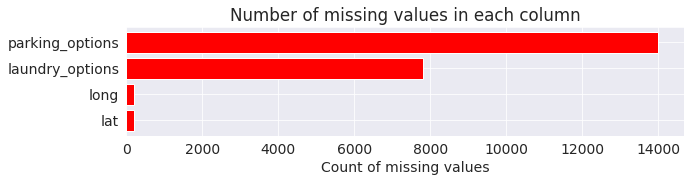

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(10,2))
rects = ax.barh(ind,missing_df.missing_count.values,color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

As shown in the bar graph above, there are some columns that have null values. So we have decided that for columns that are having null values over 1000 will be dropped as for columns with less than 1000 null values, only rows will be dropped.

In [ ]:
df.isna().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7808
parking_options            13981
image_url                      0
description                    0
lat                          194
long                         194
state                          0
dtype: int64

In [ ]:
df = df.dropna()
df = df.drop(['parking_options', 'laundry_options'], axis=1)

In [ ]:
df.isna().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23710 entries, 0 to 38497
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23710 non-null  int64  
 1   url                      23710 non-null  object 
 2   region                   23710 non-null  object 
 3   region_url               23710 non-null  object 
 4   price                    23710 non-null  int64  
 5   type                     23710 non-null  object 
 6   sqfeet                   23710 non-null  int64  
 7   beds                     23710 non-null  int64  
 8   baths                    23710 non-null  float64
 9   cats_allowed             23710 non-null  int64  
 10  dogs_allowed             23710 non-null  int64  
 11  smoking_allowed          23710 non-null  int64  
 12  wheelchair_access        23710 non-null  int64  
 13  electric_vehicle_charge  23710 non-null  int64  
 14  comes_furnished       

In [ ]:
reducedDF = df[df.price <= 5000]
reducedDF = reducedDF[reducedDF.sqfeet <= 4000]

print(f"{df.shape[0] - reducedDF.shape[0]} rows removed")

105 rows removed


In [ ]:
reducedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23605 entries, 0 to 38497
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23605 non-null  int64  
 1   url                      23605 non-null  object 
 2   region                   23605 non-null  object 
 3   region_url               23605 non-null  object 
 4   price                    23605 non-null  int64  
 5   type                     23605 non-null  object 
 6   sqfeet                   23605 non-null  int64  
 7   beds                     23605 non-null  int64  
 8   baths                    23605 non-null  float64
 9   cats_allowed             23605 non-null  int64  
 10  dogs_allowed             23605 non-null  int64  
 11  smoking_allowed          23605 non-null  int64  
 12  wheelchair_access        23605 non-null  int64  
 13  electric_vehicle_charge  23605 non-null  int64  
 14  comes_furnished       

## Exploratory Analysis and Visualization



In [ ]:
Avg_price = df.groupby('state').apply(lambda x: x['price'].mean()).reset_index(name= "Average House Price by State")
pd.set_option('display.precision',2)
Avg_price

,state,Average House Price by State
0,AK,1186.97
1,AL,915.24
2,AR,927.74
3,AZ,1044.25
4,CA,6460.86
5,CO,1563.46
6,CT,1600.31
7,DC,1990.67
8,DE,1195.93
9,FL,1361.75


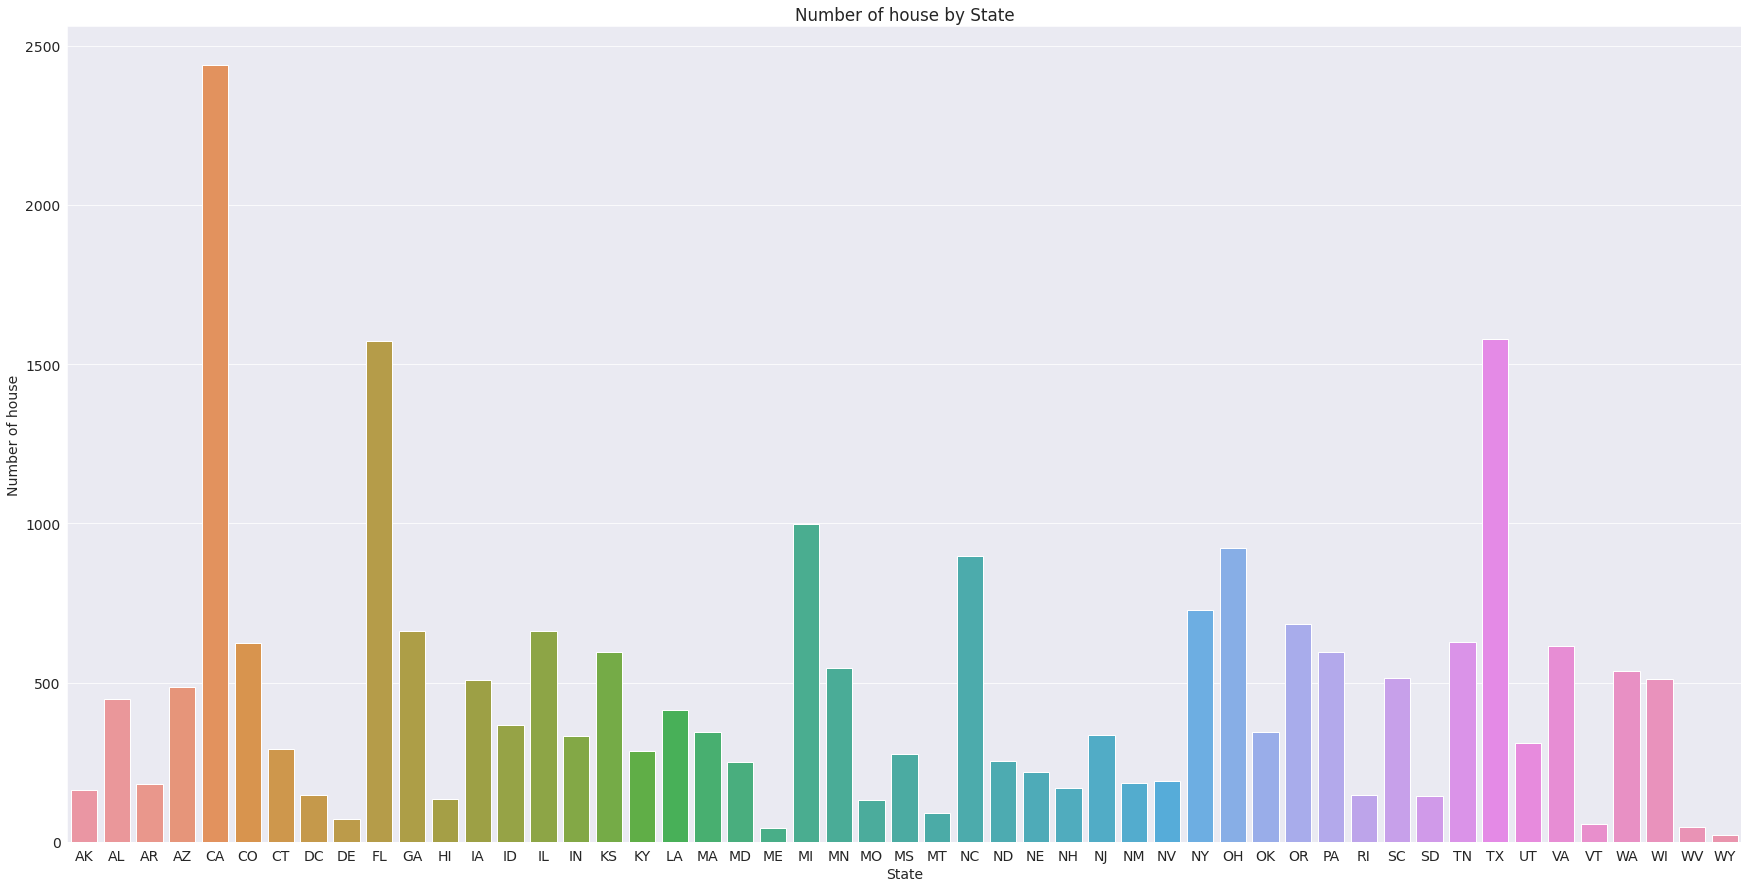

In [ ]:
# Another question
state = df.groupby('state').apply(lambda x: len(x['id'])).reset_index(name= "number house")
fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x=state['state'], y=state['number house'])
ax.set(xlabel ="State", ylabel = "Number of house", title ='Number of house by State')
plt.show()

The bar plot above proves that there are many house listing across the United States of America as California the highest number of house listing recorded and Wyoming as the least number of house listing recorded.

Text(0, 0.5, 'Probability Density')

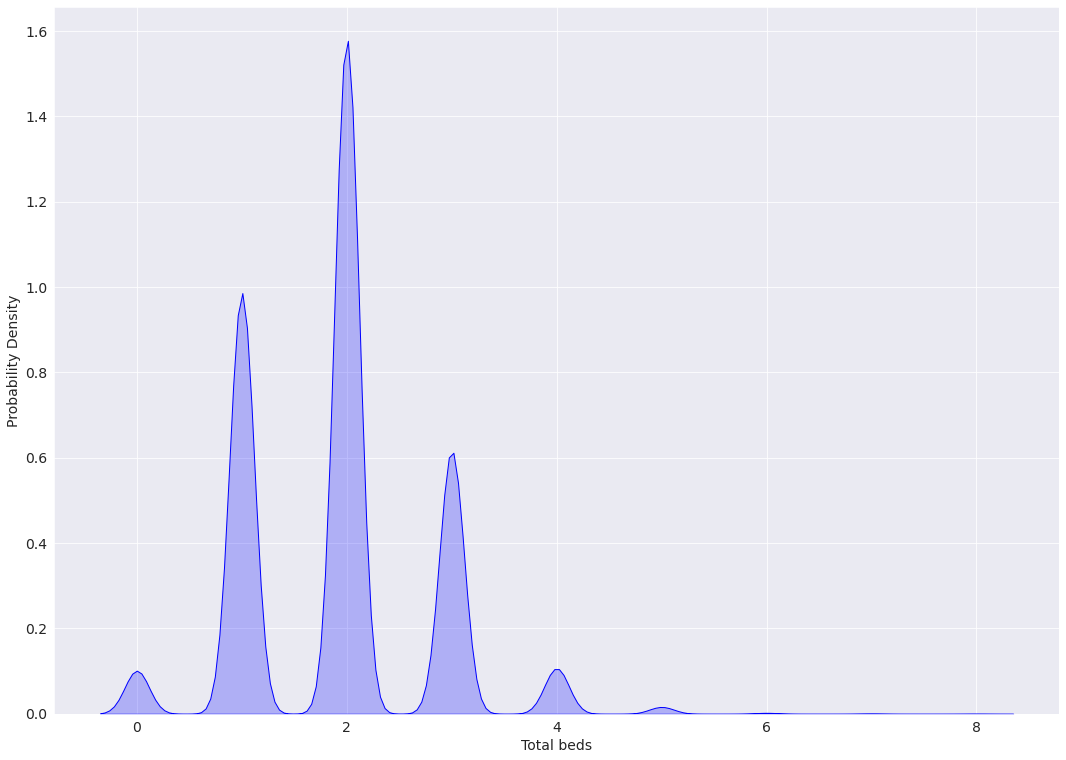

In [ ]:
fig, ax = plt.subplots(figsize=(18, 13))

sns.kdeplot(df['beds'],color='blue',shade=True, ax= ax)

# Setting the X and Y Label
plt.xlabel('Total beds')
plt.ylabel('Probability Density')

This KDE Plot shows that the average number of bedroom for houses in United States of America is 2 bedrooms.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23710 entries, 0 to 38497
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23710 non-null  int64  
 1   url                      23710 non-null  object 
 2   region                   23710 non-null  object 
 3   region_url               23710 non-null  object 
 4   price                    23710 non-null  int64  
 5   type                     23710 non-null  object 
 6   sqfeet                   23710 non-null  int64  
 7   beds                     23710 non-null  int64  
 8   baths                    23710 non-null  float64
 9   cats_allowed             23710 non-null  int64  
 10  dogs_allowed             23710 non-null  int64  
 11  smoking_allowed          23710 non-null  int64  
 12  wheelchair_access        23710 non-null  int64  
 13  electric_vehicle_charge  23710 non-null  int64  
 14  comes_furnished       

In [ ]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.37e+04,2.37e+04,2.37e+04,23710.00,23710.00,23710.00,23710.00,23710.00,23710.0,23710.00,23710.00,23710.00,23710.00
mean,7.04e+09,2.14e+03,1.36e+03,1.91,1.48,0.78,0.76,0.64,0.1,0.02,0.06,37.87,-94.23
std,8.84e+06,8.79e+04,5.45e+04,0.88,0.58,0.41,0.43,0.48,0.3,0.13,0.23,5.63,16.81
min,7.00e+09,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.20,-163.89
25%,7.04e+09,8.15e+02,7.50e+02,1.00,1.00,1.00,1.00,0.00,0.0,0.00,0.00,33.95,-105.07
50%,7.04e+09,1.05e+03,9.50e+02,2.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,38.51,-89.47
75%,7.05e+09,1.46e+03,1.15e+03,2.00,2.00,1.00,1.00,1.00,0.0,0.00,0.00,41.76,-81.59
max,7.05e+09,1.03e+07,8.39e+06,8.00,5.50,1.00,1.00,1.00,1.0,1.00,1.00,64.89,94.12


## Asking and Answering Questions


The questions were asked to make the elaboration of the dataset is easier to understand and comprehend. The visualization helped by answering the questions:


#### Q1: Which part of the country has the most list of house?

---



In [ ]:
df.groupby('state')["id"].count().sort_values()

state
WY      21
ME      44
WV      47
VT      56
DE      71
MT      89
MO     130
HI     134
SD     143
RI     146
DC     147
AK     164
NH     169
AR     182
NM     186
NV     192
NE     220
MD     251
ND     255
MS     276
KY     286
CT     293
UT     311
IN     333
NJ     335
MA     345
OK     345
ID     366
LA     415
AL     449
AZ     487
IA     508
WI     512
SC     514
WA     535
MN     547
PA     595
KS     597
VA     614
CO     625
TN     628
IL     661
GA     661
OR     685
NY     728
NC     898
OH     923
MI     999
FL    1574
TX    1579
CA    2439
Name: id, dtype: int64

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.long, df.lat))

print(gdf.head())

           id                                                url  \
0  7049031994  https://reno.craigslist.org/apa/d/reno-beautif...   
1  7049036811  https://reno.craigslist.org/apa/d/reno-20-minu...   
3  7049021849  https://reno.craigslist.org/apa/d/reno-rocky-m...   
4  7049006484  https://reno.craigslist.org/apa/d/fully-furnis...   
5  7048984910  https://reno.craigslist.org/apa/d/reno-amazing...   

         region                   region_url  price       type  sqfeet  beds  \
0  reno / tahoe  https://reno.craigslist.org    982  apartment     919     2   
1  reno / tahoe  https://reno.craigslist.org   1895  apartment    1193     2   
3  reno / tahoe  https://reno.craigslist.org   1395     duplex     988     2   
4  reno / tahoe  https://reno.craigslist.org   1125  apartment     420     1   
5  reno / tahoe  https://reno.craigslist.org   1050  apartment    1074     2   

   baths  cats_allowed  ...  smoking_allowed  wheelchair_access  \
0    2.0             1  ...                

<Figure size 3600x3600 with 0 Axes>

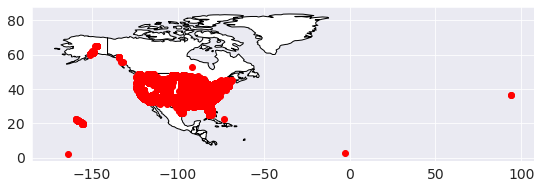

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.figure(figsize=(50, 50))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

All of houses that are in the listing are scattered all around the United States of America as shown in the heatmap above. Most of the houses are located in the eastern part of USA. There are also fairly number of houses located in Washington which are located in the western region of USA.

#### Q2: Which type of house has the most distribution?

In [ ]:
df.groupby('type')["id"].count().sort_values()

type
land                 2
in-law              21
flat                43
loft                51
cottage/cabin       72
manufactured       396
condo              478
duplex             480
townhouse         1328
house             2174
apartment        18665
Name: id, dtype: int64

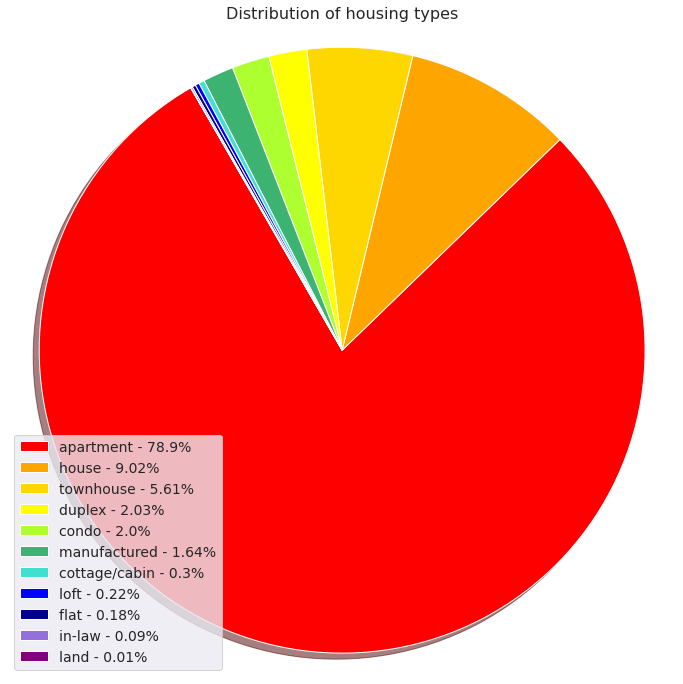

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 12)
baseColors = ["red", "orange", "gold", "yellow", "greenyellow", "mediumseagreen", "turquoise", "blue", "darkblue", "mediumpurple", "purple", "crimson"]
types = dict(reducedDF.type.value_counts())
labels = []
sizes = []
colors = []
count = 0
for k, v in types.items():
    labels.append(f"{k} - {round(((v / reducedDF.shape[0]) * 100), 2)}%")
    sizes.append(v)
    colors.append(baseColors[count])
    count += 1

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=120)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title("Distribution of housing types", fontsize = 16)
plt.show()

Looking at the pie chart above, majority of the houses listing in United States of America are apartment. Followed by terrace house, townhouse, condo, duplex, manufactured houses, loft house, cottage, flat, in-law house and assisted living respectively.

#### Q3: What are the relation between square feet and price?

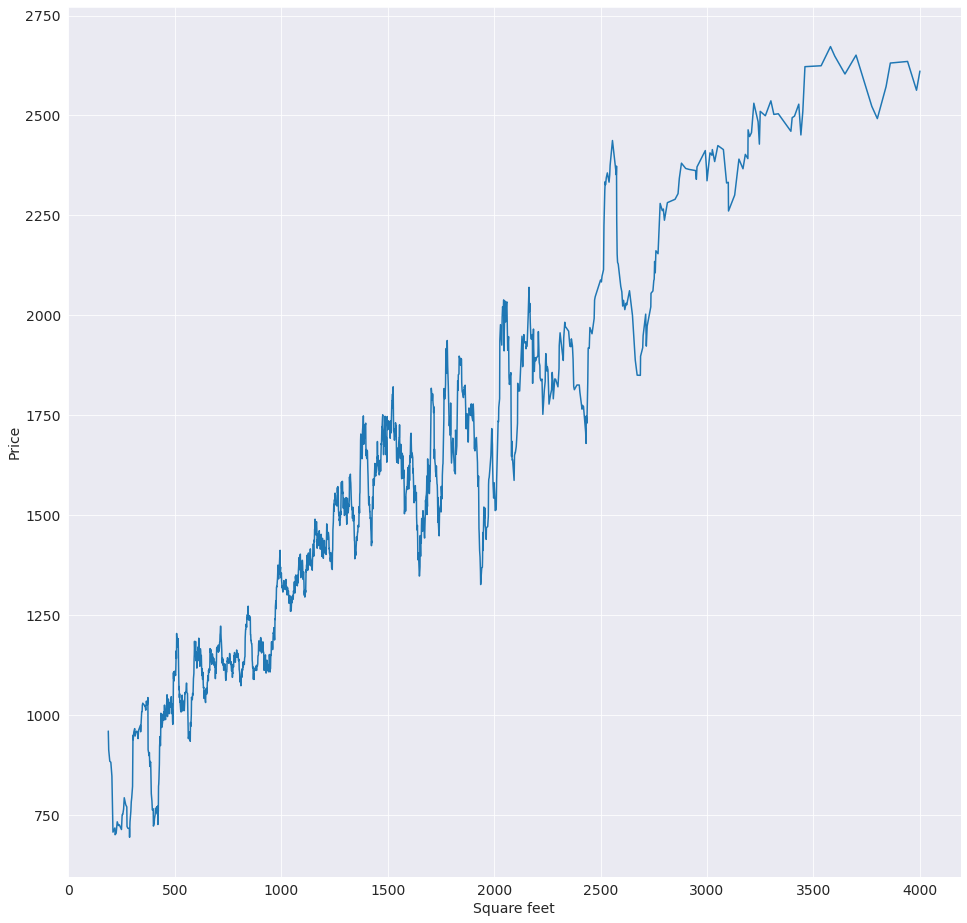

In [ ]:
fig, ax = plt.subplots(figsize = (16, 16))
grouped = reducedDF.groupby("sqfeet")["price"].mean()
rollingGrouped = grouped.rolling(25).mean()
sqfeetData = rollingGrouped.index.values
priceData = rollingGrouped.values
ax.set_xlabel("Square feet", fontsize = 14)
ax.set_ylabel("Price", fontsize = 14)
ax.plot(sqfeetData, priceData)

As shown in the graph above that the bigger the number of square feet per house, the higher the rent of the houses per month. There are also some cases that a house might have a cheap rent price with bigger square feet.

#### Q4: Does the number of bedroom affect the number of bathroom?

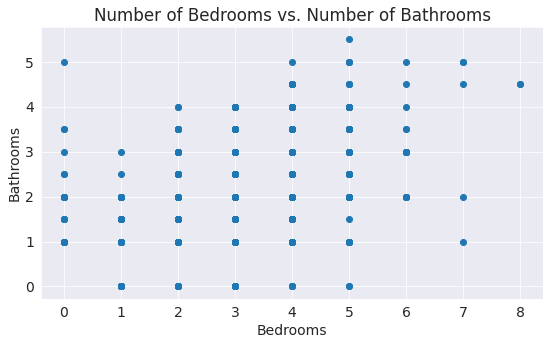

In [ ]:
bedrooms = df['beds']
bathrooms = df['baths']

# Create the scatter plot
plt.scatter(bedrooms, bathrooms)

# Add labels and title
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.title('Number of Bedrooms vs. Number of Bathrooms')

# Show the plot
plt.show()

The scatter plot above proves that the number of bedroom does not necessarily complementing the number bathrooms in a house.

#### Q5: Which region has the most house listing?

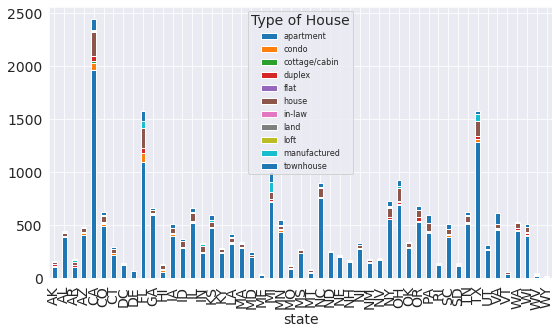

In [ ]:
df_grouped = df.groupby(['state', 'type']).size().reset_index(name='count')

# Create a pivot table with the data, with regions as the rows, types as the columns, and the count as the values
df_pivot = df_grouped.pivot(index='state', columns='type', values='count')

# Plot the pivot table as a stacked bar plot
df_pivot.plot(kind='bar', stacked=True)

# Add a legend and show the plot
plt.legend(loc='upper center', title='Type of House', fontsize=8)
plt.show()


When looking at the stacked bar plot above, it shows that California is the state in United States of America that have the most houses compared to other states.

In [ ]:
df.groupby(['state', 'type']).size().reset_index(name='count')

,state,type,count
0,AK,apartment,106
1,AK,condo,8
2,AK,cottage/cabin,3
3,AK,duplex,18
4,AK,flat,1
...,...,...,...
344,WV,townhouse,11
345,WY,apartment,15
346,WY,duplex,1
347,WY,house,2


## Inferences and Conclusion

Based on the information provided, it can be inferred that the majority of houses listed in the United States are located in the eastern part of the country, with a significant number also located in Washington. Most of these houses are apartments, followed by terrace houses and townhouses. The size of a house, as measured by its square footage, is generally correlated with its rent price, although there are some exceptions. The number of bedrooms in a house does not necessarily correspond with the number of bathrooms. Finally, California has the most houses listed of all the states in the United States.

## References and Future Work

There are several potential projects that could be undertaken using this dataset:

1. Analyzing the relationship between the location of a house and its rental price: This could involve mapping the locations of the houses in the dataset and comparing their rental prices to identify any patterns or trends. Resources that may be useful for this project include GIS software such as ArcGIS or QGIS, as well as data visualization tools such as Tableau or Excel.

2. Predicting rental prices based on various features of the houses: This project could involve using machine learning techniques to build a model that predicts the rental price of a house based on its size, number of bedrooms and bathrooms, and other features. Resources that may be useful for this project include online tutorials on machine learning, such as those available on Coursera or edX, as well as machine learning libraries such as scikit-learn or TensorFlow.

3. Identifying factors that influence the demand for rental properties: This project could involve analyzing the dataset to identify factors that influence the demand for rental properties, such as the location of the house, the size of the house, and the rent price. Resources that may be useful for this project include statistical analysis software such as R or SPSS, as well as data visualization tools such as Tableau or Excel.

4. Developing a recommendation system for rental properties: This project could involve building a recommendation system that suggests rental properties to users based on their preferences and past rental history. Resources that may be useful for this project include online tutorials on recommendation systems, such as those available on Coursera or edX, as well as machine learning libraries such as scikit-learn or TensorFlow.